# FakeRank
Hrishi Dharam, Eilam Levitov  
March 16, 2017  

### Abstract 


In [1]:
import numpy as np
import util # Linear Algebra/PageRank
from util import PersonalizedPageRank as ppr 
import misc # Random libraries and graphing
import matplotlib.pyplot as plt
import ipywidgets as widgets
from __future__ import division
%matplotlib inline  

/Users/Hrishid/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# 1) Google Search
inputText = widgets.Text()
inputText

In [19]:
inputText.value.decode('unicode_escape').encode('ascii','ignore')

'shoe store'

In [20]:
links = misc.gSearch(str(inputText.value.decode('unicode_escape').encode('ascii','ignore')))

Retrieving pages...
https://www.yelp.com/search?cflt=shoes&find_loc=Berkeley%2C+CA
http://www.dsw.com/
http://www.ninersnation.com/2017/3/14/14923024/kirk-cousins-trade-demand-shoe-store-employee
http://www.rackroomshoes.com/storelocator.html
http://www.walkshop.com/
http://shoesonsolano.com/
http://www.aldoshoes.com/us/en_US/store-finder
http://www.footwearetc.com/locations/
http://www.famousfootwear.com/
http://www.redwingshoes.com/red-wing-shoe-stores
http://elmwoodvillageshoes.com/
http://www.shoecarnival.com/coupons
https://stores.shoecarnival.com/
https://www.skechers.com/en-us/store-locator
https://www.clarksusa.com/us/store-locator
http://www.footsmart.com/womens-shoe-store
http://www.payless.com/
http://www.offbroadwayshoes.com/storelocator.html
http://www.roadrunnersports.com/rrs/storeLocator/store/berkeley
https://www.journeys.com/
https://www.shoeshow.com/find-a-store
http://www.zappos.com/
https://rabatshoes.com/
http://www.vionicshoes.com/store-locator
http://www.lordandt

In [21]:
print len(links)

50


In [22]:
# 2) Create Similarity Matrix
mtx = misc.simMatrix(links)

Generating similarity vectors...
22th parse was unsuccessful :(
28
35
Similarity Matrix computed
62.0310249329


In [23]:
#print mtx[10:20]
for i in mtx:
    if sum(i) == 0:
        print i
        print "isn't working"

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
isn't working


In [24]:
badIndeces = [i for i in range(mtx.shape[0]) if sum(mtx[i]) == 0]
print badIndeces

[34]


In [25]:
for i in sorted(badIndeces, reverse=True):
    mtx = np.delete(mtx, i, axis = 1)
    mtx = np.delete(mtx, i, axis = 0)
badIndeces = [i for i in range(mtx.shape[0]) if sum(mtx[i]) == 0]
print badIndeces
    

[]


[[ 0.          0.          0.         ...,  0.07692308  0.          0.07692308]
 [ 0.          0.          1.         ...,  0.          0.          0.        ]
 [ 0.          0.33333333  0.         ...,  0.33333333  0.          0.        ]
 ..., 
 [ 0.04        0.          0.04       ...,  0.          0.04        0.04      ]
 [ 0.          0.          0.         ...,  0.04545455  0.          0.04545455]
 [ 0.04166667  0.          0.         ...,  0.04166667  0.04166667  0.        ]]


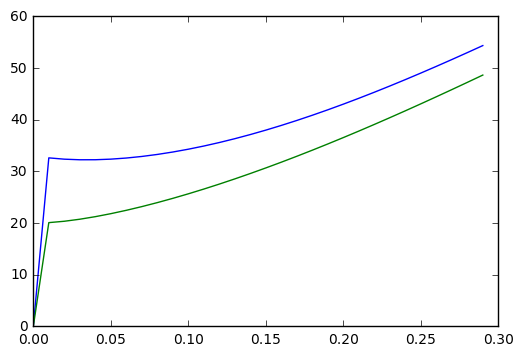

choose alpha=.05
32.2600859584


In [30]:
clustering = ppr(adjacencyMatrix = mtx, alpha = .1)
print clustering.transitionMatrix
v = [clustering.prVariance(alpha) for alpha in np.arange(0,.3,.01)]
plt.plot(np.arange(0, .3, .01), v)
plt.plot(np.arange(0, .3, .01), [clustering.clusterVariance(alpha) for alpha in np.arange(0, .3, .01)])
plt.show()
print 'choose alpha=.05'
print clustering.prVariance(.03)

In [52]:
stationaryDist = 1/clustering.n * sum(clustering.getHubVectors())

vals, vecs = np.linalg.eig(clustering.transitionMatrix.T)
print clustering.pageRank
print vals[0]
v = vecs[:,0]
v*= 1/sum(v)
print v
print clustering.transitionMatrix.T.dot(v)

AttributeError: PersonalizedPageRank instance has no attribute 'pageRank'

In [32]:
print clustering.transitionMatrix

[[ 0.          0.          0.         ...,  0.07692308  0.          0.07692308]
 [ 0.          0.          1.         ...,  0.          0.          0.        ]
 [ 0.          0.33333333  0.         ...,  0.33333333  0.          0.        ]
 ..., 
 [ 0.04        0.          0.04       ...,  0.          0.04        0.04      ]
 [ 0.          0.          0.         ...,  0.04545455  0.          0.04545455]
 [ 0.04166667  0.          0.         ...,  0.04166667  0.04166667  0.        ]]
